<a href="https://colab.research.google.com/github/giannishorgos/DatabasesAUTh/blob/main/neural_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')

    data = {
      'labels': np.array(data[b'labels']),
      'data': np.array(data[b'data']),
      'filenames': np.array(data[b'filenames'])
    }

    return data

train_df = unpickle('data_batch_1')
test_df = unpickle('test_batch')

def load_all():
    for i in range(2, 6):
        temp = unpickle('data_batch_{}'.format(i))
        train_df['data'] = np.concatenate((train_df['data'], temp['data']))
        train_df['labels'] = np.append(train_df['labels'], temp['labels'])

In [14]:
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import numpy as np
import time


def model_accuracy(y_pred, y_test):
    if len(y_pred) != len(y_test):
        raise Exception('Arrays does not have the same length')

    errors = 0
    for i in range(len(y_test)):
        if y_test[i] != y_pred[i]:
            errors += 1

    return 1 - errors / len(y_test)


def nearest_neighbors(n=1):
    classifier = KNeighborsClassifier(n_neighbors=n, weights='distance')
    classifier.fit(train_df['data'], train_df['labels'])

    start_training = time.time()
    test_pred = classifier.predict(test_df['data'])
    print('Neartest neighbors {} '.format(n), time.time() - start_training)
    return model_accuracy(test_pred, test_df['labels'])


def nearest_centroid():
    classifier = NearestCentroid()
    classifier.fit(train_df['data'], train_df['labels'])

    start_training = time.time()
    test_pred = classifier.predict(test_df['data'])
    print('centroid ', time.time() - start_training)
    return model_accuracy(test_pred, test_df['labels'])

def perceptron():
    mlp = MLPClassifier(hidden_layer_sizes=(500, 250), max_iter=500, random_state=42, activation='logistic',  # 'logistic' for sigmoid activation
    learning_rate='adaptive',
    alpha=0.0001)
    start_training = time.time()
    mlp.fit(train_df['data'], train_df['labels'])
    print('perceptron', time.time() - start_training)

    test_pred = mlp.predict(test_df['data'])
    return model_accuracy(test_pred, test_df['labels'])



# accuracy = {
#     'Nearest Neighbors (n=1)': nearest_neighbors(n=1),
#     'Nearest Neighbors (n=3)': nearest_neighbors(n=3),
#     'Nearest Centroid': nearest_centroid(),
#     'Perceptron (Back-Propagation)': perceptron()
# }

# load_all()

# accuracy_full = {
#     'Nearest Neighbors (n=1)': nearest_neighbors(n=1),
#     'Nearest Neighbors (n=3)': nearest_neighbors(n=3),
#     'Nearest Centroid': nearest_centroid(),
#     'Perceptron (Back-Propagation)': perceptron()
# }

# bar_width = 0.35
# x = np.arange(len(accuracy.keys()))

# fig, ax = plt.subplots()
# bar1 = ax.bar(x + bar_width / 2, accuracy.values(),bar_width, label="One batch of data")
# bar2 = ax.bar(x - bar_width / 2, accuracy_full.values(), bar_width,label="All batches of data")

# ax.set_xlabel('Classifiers')
# ax.set_ylabel('Accuracy')
# ax.set_title('Classifiers Accuracy Ration')
# ax.set_xticks(x)
# ax.set_xticklabels(accuracy.keys())
# ax.legend()
# ax.grid(visible=True, alpha=0.5)

# plt.xticks(rotation=45)
# plt.show()

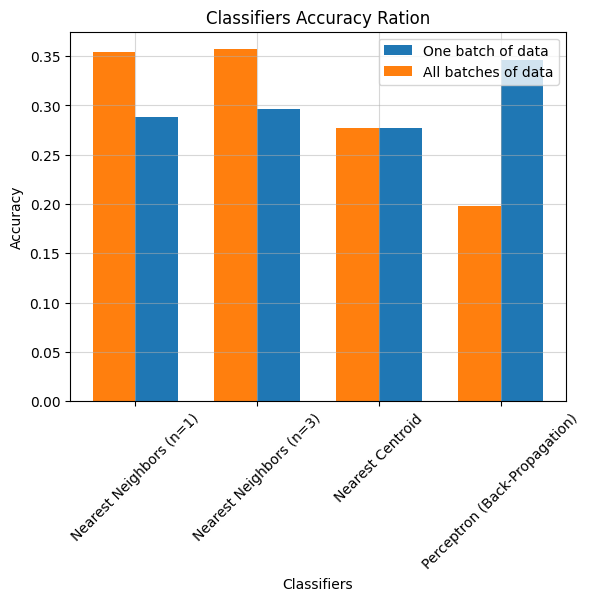

In [105]:
bar_width = 0.35
x = np.arange(len(accuracy.keys()))

fig, ax = plt.subplots()
bar1 = ax.bar(x + bar_width / 2, accuracy.values(), bar_width, label="One batch of data")
bar2 = ax.bar(x - bar_width / 2, accuracy_full.values(), bar_width,label="All batches of data")

ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_title('Classifiers Accuracy Ration')
ax.set_xticks(x)
ax.set_xticklabels(accuracy.keys())
ax.legend()
ax.grid(visible=True, alpha=0.5)

plt.xticks(rotation=45)
plt.show()

In [15]:
temp = 0.346 # 100, 50
# load_all()
percep = perceptron()

perceptron 2242.79310631752


In [13]:
percep

0.09999999999999998

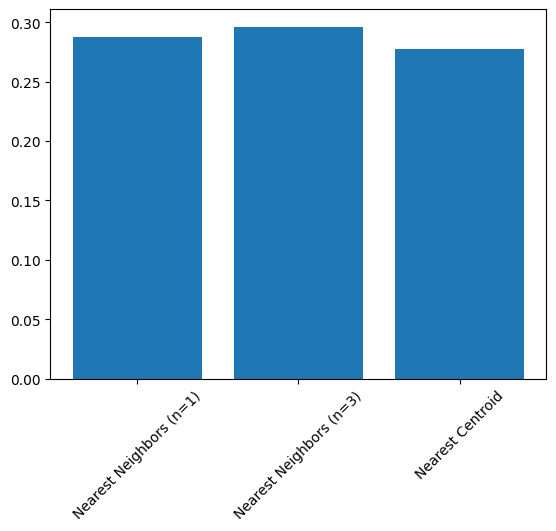

In [ ]:


plt.bar(accuracy.keys(), accuracy.values())
plt.xticks(rotation=45)
plt.show()


In [ ]:
# full data
import numpy as np

train_df= unpickle('data_batch_1')
test_df = unpickle('test_batch')
for i in range(2, 6):
  temp = unpickle('data_batch_{}'.format(i))
  print(len(train_df["data"]))
  print(train_df["data"])
  train_df['data'] = np.concatenate((train_df['data'], temp['data']))
  train_df['labels'] = np.append(train_df['labels'], temp['labels'])
  # train_df['filenames'] += temp['filenames']



10000
[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 71  60  74 ...  68  69  68]
 [250 254 211 ... 215 255 254]
 [ 62  61  60 ... 130 130 131]]
20000
[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [127 139 155 ... 197 192 191]
 [190 200 208 ... 163 182 192]
 [177 174 182 ... 119 127 136]]
30000
[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [175 200 207 ... 124  49  32]
 [ 28  59  67 ...  36  44  41]
 [ 62  40  61 ... 127 124 116]]
40000
[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [167 164 151 ... 132 142 130]
 [ 45  46  46 ...  30  34  24]
 [235 239 239 ... 182 175 174]]


In [ ]:
accuracy_full = {
    'Nearest Neighbors (n=1)': nearest_neighbors(n=1),
    'Nearest Neighbors (n=3)': nearest_neighbors(n=3),
    'Nearest Centroid': nearest_centroid()

}

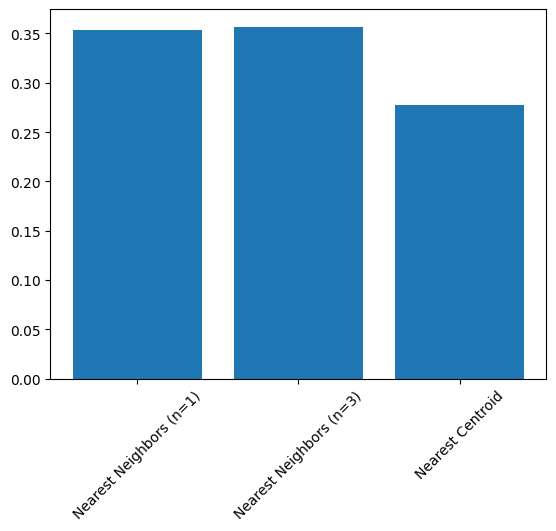

In [ ]:
plt.bar(accuracy_full.keys(), accuracy_full.values())
plt.xticks(rotation=45)
plt.show()

In [ ]:
accuracy_full.values(), accuracy.values()

(dict_values([0.3539, 0.3569, 0.2774]),
 dict_values([0.28769999999999996, 0.2962, 0.277]))

In [103]:
from sklearn.neural_network import MLPClassifier
import time

input_len = len(train_df['data'][0])
print(input_len)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),
                    max_iter=500, random_state=42)

start_training = time.time()
# Fit the model to the training data
mlp.fit(train_df['data'], train_df['labels'])
print(time.time() - start_training)
# Make predictions on the testing data
predictions = mlp.predict(test_df['data'])
model_accuracy(predictions, test_df['labels'])


3072
141.52227544784546


0.346

In [73]:
import numpy as np


print(max(train_df['labels'] + 1))

10


In [97]:
import numpy as np
import time

class Perceptron:
    def __init__(self, input, output, hidden_layers=[100, 80], l_rate=1):
        self.input = input
        self.output = output
        self.input_layer = len(input[0])
        self.output_layer = max(output) + 1 # index starts at 0
        self.total_layers = hidden_layers + [self.output_layer]
        self.l_rate = l_rate
        self.network = []

        self.init_network()

    def init_network(self):
        neuron_input_size = self.input_layer
        layer_weights = []

        for layer in self.total_layers:
            for _ in range(layer):
                layer_weights.append({'weights' : np.random.rand(neuron_input_size)})
            self.network.append(layer_weights)
            neuron_input_size = layer
            layer_weights = []


    def activate(self, input, neuron_weights):
        if len(input) != len(neuron_weights):
            raise "Input and Neuron Weights must have same length!"
            input.append(-1)
            neuron_weights.append(1)
        return np.dot(input, neuron_weights)


    def transfer(self, activation):
        return 1.0 / (1.0 + np.exp(-activation))


    # Calculate the derivative of an neuron output
    def transfer_derivative(self, output):
        return output * (1.0 - output)


    def forward_propagate(self, input):
        for i, layer in enumerate(self.total_layers):
            next_input = []
            for j in range(layer):
                self.network[i][j]['output'] = self.transfer(self.activate(input, self.network[i][j]['weights']))
                next_input.append(self.network[i][j]['output'])
            input = next_input


    # Backpropagate error and store in neurons
    def backward_propagate_error(self, expected):
        for i in reversed(range(len(self.network))):
            layer = self.network[i]
            errors = []
            if i != len(self.network)-1:
                for j in range(len(layer)):
                    error = 0.0
                    for neuron in self.network[i + 1]:
                        error += (neuron['weights'][j] * neuron['delta'])
                    errors.append(error)
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    errors.append(neuron['output'] - expected[j])
            for j in range(len(layer)):
                neuron = layer[j]
                neuron['delta'] = errors[j] * self.transfer_derivative(neuron['output'])

    # Update network weights with error
    def update_weights(self, inputs):
        for i in range(len(self.network)):
            if i != 0:
                inputs = [neuron['output'] for neuron in self.network[i - 1]]
            for neuron in self.network[i]:
                for j in range(len(inputs)):
                    neuron['weights'][j] -= self.l_rate * neuron['delta'] * inputs[j]
                neuron['weights'][-1] -= self.l_rate * neuron['delta']
    def fit(self):
        for i, entry in enumerate(self.input):
            self.forward_propagate(entry)
            self.backward_propagate_error([1 if self.output[i] == i else 0 for _ in range(self.output_layer)]) # zeros everywhere except where the label
            if i % 10 == 0:
                self.update_weights(entry)
        self.update_weights(self.input[-1])

    def predict(self, input):
        result = []
        for entry in input:
            self.forward_propagate(entry)
            predictions = [neuron['output'] for neuron in self.network[-1]]
            result.append(predictions.index(max(predictions)))
        return result


p = Perceptron(train_df['data'], train_df['labels'], [15])
# p.init_network()
# p.forward_propagate([1,2,3,4])
# p.network
# p.backward_propagate_error([0.8, 0.3])
# print(p.network)
# p.update_weights([1,2,3,4])
# print(p.network)
start = time.time()
# print(p.network, len(p.network))
p.fit()
# print(p.network, len(p.network))
print("training finished in {} seconds".format(time.time() - start))

[[{'weights': array([0.92148552, 0.83426361, 0.41672271, ..., 0.7591207 , 0.93747008,
       0.04521147])}, {'weights': array([0.31136416, 0.44833657, 0.61545489, ..., 0.98651966, 0.96625908,
       0.02219402])}, {'weights': array([0.53993484, 0.71425242, 0.62359217, ..., 0.36049691, 0.74512996,
       0.56633862])}, {'weights': array([0.31496524, 0.98606288, 0.9544881 , ..., 0.78207578, 0.44901136,
       0.80402102])}, {'weights': array([0.70948736, 0.05676443, 0.34142089, ..., 0.36449951, 0.27082314,
       0.75452649])}, {'weights': array([0.1159959 , 0.92201473, 0.13325884, ..., 0.7214039 , 0.13578897,
       0.59970657])}, {'weights': array([0.98106796, 0.92604623, 0.56064696, ..., 0.31637028, 0.39445806,
       0.40737653])}, {'weights': array([0.53614767, 0.25796809, 0.23507691, ..., 0.66321777, 0.63489587,
       0.73761649])}, {'weights': array([0.8495164 , 0.69478224, 0.27788423, ..., 0.74817447, 0.21296542,
       0.062683  ])}, {'weights': array([0.11135842, 0.93859525, 0

In [96]:
model_accuracy(p.predict(test_df['data']), test_df['labels'])

0.09999999999999998

In [91]:
# pred = p.predict(test_df['data'])
# model_accuracy(pred, test_df['labels'])

print(p.network)
for layer in p.network:
    print(layer['weights'])

[{'weights': array([[0.06333452, 0.64183555, 0.88940949, ..., 0.33972521, 0.83074763,
        0.5618703 ],
       [0.5434364 , 0.51450717, 0.67390356, ..., 0.7886137 , 0.17420055,
        0.81447905],
       [0.05297342, 0.59468982, 0.00620761, ..., 0.16030816, 0.64791164,
        0.46822974],
       ...,
       [0.05372543, 0.74213685, 0.99748598, ..., 0.24922315, 0.37484981,
        0.5811557 ],
       [0.57945028, 0.40299396, 0.93440814, ..., 0.68562113, 0.94212376,
        0.79693881],
       [0.04434035, 0.54027023, 0.00769523, ..., 0.28260398, 0.6510968 ,
        0.02575097]]), 'output': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1

In [85]:
class Perceptron:
    # ... (same as before)
    def __init__(self, input, output, hidden_layers=[100, 80], l_rate=1):
        self.input = input
        self.output = output
        self.input_layer = len(input[0])
        self.output_layer = max(output) + 1 # index starts at 0
        self.total_layers = hidden_layers + [self.output_layer]
        self.l_rate = l_rate
        self.network = []


    def init_network(self):
        self.network = []
        neuron_input_size = self.input_layer

        for layer in self.total_layers:
            layer_weights = {'weights': np.random.rand(layer, neuron_input_size)}
            self.network.append(layer_weights)
            neuron_input_size = layer

    def activate(self, input, neuron_weights):
        activation = 1
        if len(input) != len(neuron_weights):
            raise "Input and Neuron Weights must have same length!"
        return np.dot(input, neuron_weights)


    def transfer(self, activation):
        return 1.0 / (1.0 + np.exp(-activation))


    # Calculate the derivative of an neuron output
    def transfer_derivative(self, output):
        return output * (1.0 - output)

    def forward_propagate(self, input):
        for layer in self.network:
            layer['output'] = self.transfer(np.dot(layer['weights'], input))

    def backward_propagate_error(self, expected):
        for i in reversed(range(len(self.network))):
            layer = self.network[i]
            errors = []
            if i != len(self.network) - 1:
                errors = np.dot(np.array([neuron['weights'] for neuron in self.network[i + 1]]).T,
                                np.array([neuron['delta'] for neuron in self.network[i + 1]]))
            else:
                errors = layer['output'] - expected
            layer['delta'] = errors * self.transfer_derivative(layer['output'])

    def update_weights(self, inputs):
        for i in range(len(self.network)):
            layer_input = inputs if i == 0 else self.network[i - 1]['output']
            self.network[i]['weights'] -= self.l_rate * np.outer(self.network[i]['delta'], layer_input)


    def fit(self):
        self.init_network()
        for i, entry in enumerate(self.input):
            self.forward_propagate(entry)
            self.backward_propagate_error([1 if self.output[i] == i else 0 for _ in range(self.output_layer)]) # zeros everywhere except where the label
            if i % 10 == 0:
                self.update_weights(entry)
        self.update_weights(self.input[-1])


    def predict(self, input):
        result = []
        for entry in input:
            self.forward_propagate(entry)
            predictions = [neuron['output'] for neuron in self.network[-1]]
            result.append(predictions.index(max(predictions)))
        return result

In [86]:
p = Perceptron(train_df['data'], train_df['labels'], [100, 70])
# p.init_network()
# p.forward_propagate([1,2,3,4])
# p.network
# p.backward_propagate_error([0.8, 0.3])
# print(p.network)
# p.update_weights([1,2,3,4])
# print(p.network)
start = time.time()
p.fit()
print("training finished in {} seconds".format(time.time() - start))
model_accuracy(p.predict(test_df['data']), test_df['labels'])

ValueError: ignored